# Used Car Price Prediction in Nigeria

In [1]:
#import libraries needed
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#read the dataset
car = pd.read_csv('car_scrape.csv')

#view few rows
car.head()

,title,odometer,location,isimported,engine,transmission,fuel,paint,price,year
0,Toyota Corolla,60127,Lagos,Locally used,4-cylinder(I4),automatic,petrol,Silver,1995000,2009
1,Acura MDX,132908,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Whine,3315000,2009
2,Lexus ES 350,120412,Lagos,Locally used,6-cylinder(V6),automatic,petrol,Silver,2655000,2008
3,Mercedes-Benz GLK 350,67640,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Black,9015000,2013
4,Mercedes-Benz E 200,92440,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,Black,5790000,2013


## Understanding the Columns

Title: The make and model of the car

Odometer: The odometer reading, indicating the number of miles or kilometers the car has traveled.

Location: The city or region where the car is currently listed for sale. 

Is Imported: Indicates whether the car is locally used or foreign used.

Engine: Describes the type of engine the car is equipped with, including the number of cylinders. 

Transmission: Specifies the type of transmission, whether automatic or manual. 

Fuel: The fuel type the car is designed to use, such as petrol. 

Paint: The color of the car's exterior.

Price: The listed price of the used car

Year: The year in which the car was manufactured.

### Data Analysis

In [3]:
#check the number of rows and columns

car.shape

(1451, 10)

1451 rows and 10 columns

In [4]:
#the information of the data

car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1451 entries, 0 to 1450
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         1451 non-null   object
 1   odometer      1451 non-null   int64 
 2   location      1451 non-null   object
 3   isimported    1451 non-null   object
 4   engine        1451 non-null   object
 5   transmission  1451 non-null   object
 6   fuel          1451 non-null   object
 7   paint         1451 non-null   object
 8   price         1451 non-null   int64 
 9   year          1451 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 113.5+ KB


The dataset has both object(7) columns and integer(7) columns

In [5]:
#check for missing values

car.isnull().sum()

title           0
odometer        0
location        0
isimported      0
engine          0
transmission    0
fuel            0
paint           0
price           0
year            0
dtype: int64

In [6]:
#check for duplicates

car.duplicated().sum()

1

We have one duplicate row, let's view and drop it

In [7]:
car[car.duplicated() == True]

,title,odometer,location,isimported,engine,transmission,fuel,paint,price,year
881,Lexus RX 350,13572,Lagos,Locally used,6-cylinder(V6),automatic,petrol,Black,7715000,2012


In [8]:
#let's drop the duplicate row

car.drop_duplicates(keep='first', inplace=True)

In [9]:
#check the rows the dataset has again

car.shape

(1450, 10)

### Data Cleaning

In [10]:
car = car.drop(car[car['odometer'] <=0].index)

In [11]:
car.shape

(1415, 10)

In [12]:
#renaming the columns

car.columns = [
                'title','Odometer','Location','Imported','Engine', 'Transmission',
                'Fuel Type','Color','Price','Year'
]

In [13]:
#checking Car Type column

car['title'].value_counts()

Toyota Camry                179
Toyota Corolla              159
Toyota Highlander            79
Toyota Sienna                78
Toyota RAV 4                 59
                           ... 
Volvo FL12                    1
Isuzu NQR                     1
Man Diesel 19.314 FILT-N      1
Lincoln Mark                  1
Mercedes-Benz S 450           1
Name: title, Length: 220, dtype: int64

In [14]:
car['title'] = car['title'].str.replace('Mercedes-Benz', 'Mercedes Benz')

In [15]:
#replace BMW to BMW BMW

car['title'] = car['title'].str.replace('BMW', 'BMW BMW')

In [16]:
car['title'] = car['title'].str.replace('Land Rover', 'Land-Rover')
car['title'] = car['title'].str.replace('DAF', 'DAF DAF')
car['title'] = car['title'].str.replace('Infiniti', 'Infiniti Infiniti')
car['title'] = car['title'].str.replace('Mazda', 'Mazda Mazda')
car['title'] = car['title'].str.replace('Mitsubishi L200', 'Mitsubishi Mitsubishi L200')
car['title'] = car['title'].str.replace('Nissan A', 'Nissan Nissan A')
car['title'] = car['title'].str.replace('Peugeot', 'Peugeot Peugeot')
car['title'] = car['title'].str.replace('Volvo', 'Volvo')

In [17]:
#separating brand name and car type

def first_piece(i_string):
    return i_string.split()[0]

car['Brand'] = list(map(first_piece, car.title))

In [18]:
#for car type

car['Car Type'] = car['title'].apply(lambda x: x.split(' ', 1)[1] if ' ' in x else '')


In [19]:
car.head(100)

,title,Odometer,Location,Imported,Engine,Transmission,Fuel Type,Color,Price,Year,Brand,Car Type
0,Toyota Corolla,60127,Lagos,Locally used,4-cylinder(I4),automatic,petrol,Silver,1995000,2009,Toyota,Corolla
1,Acura MDX,132908,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Whine,3315000,2009,Acura,MDX
2,Lexus ES 350,120412,Lagos,Locally used,6-cylinder(V6),automatic,petrol,Silver,2655000,2008,Lexus,ES 350
3,Mercedes Benz GLK 350,67640,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Black,9015000,2013,Mercedes,Benz GLK 350
4,Mercedes Benz E 200,92440,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,Black,5790000,2013,Mercedes,Benz E 200
...,...,...,...,...,...,...,...,...,...,...,...,...
111,Toyota Corolla,253516,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,Grey,2465000,2004,Toyota,Corolla
112,Honda Crosstour,156135,Adamawa,Locally used,6-cylinder(V6),automatic,petrol,Black,2715000,2010,Honda,Crosstour
113,Mercedes Benz E 350,6297,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,White,3615000,2009,Mercedes,Benz E 350
114,Toyota Sienna,167457,Lagos,Foreign Used,6-cylinder(I6),automatic,petrol,Blue,2765000,2005,Toyota,Sienna


In [20]:
car['Brand'] = car['Brand'].str.capitalize()

In [21]:
#drop the title column
car.drop('title', axis = 1, inplace= True)

In [22]:
#reorder the columns
order = ['Brand','Car Type', "Odometer", 'Location', 'Imported', 'Engine', 'Transmission','Fuel Type', 'Color','Year','Price']
car = car[order]

In [23]:
#how many unique brands do we have

car['Brand'].nunique()

38

In [24]:
car['Brand'].value_counts()

Toyota         694
Lexus          175
Mercedes       145
Honda          115
Ford            43
Hyundai         35
Nissan          30
Land-rover      25
Kia             17
Volkswagen      16
Acura           13
Bmw             13
Mazda            9
Volvo            8
Mack             7
Mitsubishi       7
Infiniti         7
Chevrolet        6
Peugeot          6
Porsche          5
Mini             4
Pontiac          4
Gac              4
Man              4
Daf              3
Jeep             3
Iveco            3
Jaguar           3
Rolls-royce      2
Audi             1
Alpina           1
Jmc              1
Dodge            1
Fiat             1
Gmc              1
Lincoln          1
Bentley          1
Isuzu            1
Name: Brand, dtype: int64

There are 38 different brands in the dataset

In [25]:
#how many locations are these cars available

car['Location'].nunique()

15

In [26]:
car['Location'].value_counts()

Lagos                1096
Abuja                 212
Lagos                  34
Ogun                   34
Lagos State            21
other                   5
Ogun State              2
Abuja                   2
Abia                    2
FCT                     2
Adamawa                 1
Abia State              1
Arepo ogun state        1
Accra                   1
Mushin                  1
Name: Location, dtype: int64

In [27]:
car['Location'] = car['Location'].str.replace('Lagos State', 'Lagos')
car['Location'] = car['Location'].str.replace('Ogun State', 'Ogun')
car['Location'] = car['Location'].str.replace('Arepo ogun state', 'Ogun')

In [28]:
#trip Location column
car['Location'] = car['Location'].str.strip()

In [29]:
# any location less than 5 should be under others

loc_count = car.Location.value_counts()
loc_count

paint_top = list(loc_count[loc_count.values>=6].index)
car['Location'] = car.Location.where(car.Location.isin(paint_top), 'Others')
car.Location.value_counts()

Lagos     1151
Abuja      214
Ogun        37
Others      13
Name: Location, dtype: int64

In [30]:
#how many import types

car['Imported'].nunique()


3

In [31]:
car['Imported'].value_counts()

Foreign Used    1059
Locally used     316
New               40
Name: Imported, dtype: int64

In [32]:
#engine type

car['Engine'].nunique()

9

In [33]:
car['Engine'].value_counts()

4-cylinder(I4)      882
6-cylinder(V6)      299
6-cylinder(I6)      154
8-cylinder(V8)       68
3-cylinder(I3)        4
5-cylinder(I5)        3
4-cylinder(H4)        2
2-cylinder(I2)        2
12-cylinder(V12)      1
Name: Engine, dtype: int64

In [34]:
#replace any engine less than 5 with Others

paint_count = car.Engine.value_counts()
paint_count

paint_top = list(paint_count[paint_count.values>5].index)
car['Engine'] = car.Engine.where(car.Engine.isin(paint_top), 'Others')
car.Engine.value_counts()

4-cylinder(I4)    882
6-cylinder(V6)    299
6-cylinder(I6)    154
8-cylinder(V8)     68
Others             12
Name: Engine, dtype: int64

In [35]:
#different volors available

color = car['Color'].nunique()
print('There are {} colors in the dataset'.format(color))

There are 85 colors in the dataset


In [36]:
#check out the colors available


colors = car['Color'].value_counts().nlargest(20)
print(colors)

Black        408
Silver       164
White        157
Grey         113
Blue          96
Red           89
Dark Grey     61
Gold          46
Gray          30
Green         26
white         23
Brown         21
Black         19
Dark Blue     18
Wine          10
Sliver         7
Blue           6
Silver         6
Yellow         5
Grey           5
Name: Color, dtype: int64


In [37]:
# the clor column needs cleaning, let's clean that

car['Color'] = car['Color'].str.upper().str.strip()

In [38]:
car['Color'] = car['Color'].str.replace('WHINE', 'WINE')
car['Color'] = car['Color'].str.replace('GRAY', 'GREY')
car['Color'] = car['Color'].str.replace('SLIVER', 'SILVER')

In [39]:
car['Color'].value_counts().nlargest(25)

BLACK         431
WHITE         183
SILVER        179
GREY          149
BLUE          106
RED            92
DARK GREY      64
GOLD           52
GREEN          29
BROWN          22
DARK BLUE      22
WINE           12
CREAM           6
ASH             5
YELLOW          5
DARK ASH        5
DARK GREEN      4
MAROON          3
PURPLE          3
DEEP BLUE       2
WHITE-BLUE      2
MILK            2
NAVY BLUE       2
BEIGE           2
SKY BLUE        2
Name: Color, dtype: int64

In [40]:
#replace any color less than 5 with Others

paint_count = car.Color.value_counts()
paint_count

paint_top = list(paint_count[paint_count.values>5].index)
car['Color'] = car.Color.where(car.Color.isin(paint_top), 'Others')
car.Color.value_counts()

BLACK        431
WHITE        183
SILVER       179
GREY         149
BLUE         106
RED           92
Others        68
DARK GREY     64
GOLD          52
GREEN         29
BROWN         22
DARK BLUE     22
WINE          12
CREAM          6
Name: Color, dtype: int64

In [41]:
car['Color'] = car['Color'].str.capitalize()

In [42]:
car['Year'].unique()

array([2009, 2008, 2013, 2016, 2000, 2010, 2007, 2006, 2015, 2014, 2004,
       2001, 2011, 2012, 2005, 2002, 2019, 2020, 2018, 2003, 1994, 2017,
       1997, 1995, 1991, 1998, 1218, 1996, 1726, 1999, 1980, 1217, 1324,
       1985], dtype=int64)

In [43]:
#remove rows where year > 2021 and year < 1980

#drop year less than 1980
car = car.drop(car[car['Year']< 1980].index)

#drop year geater than 2021
car = car.drop(car[car['Year']> 2020].index)

### Data Visualization

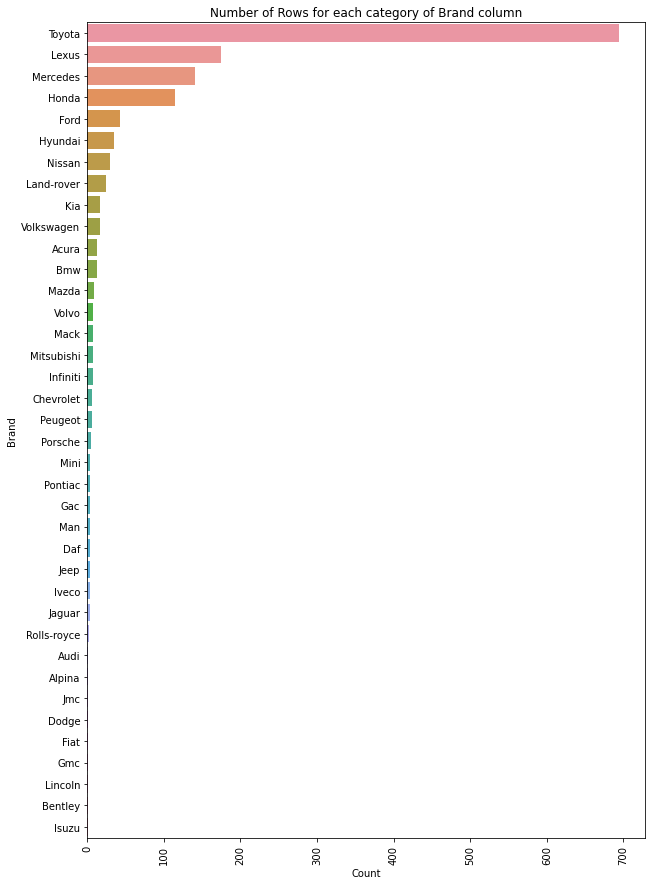

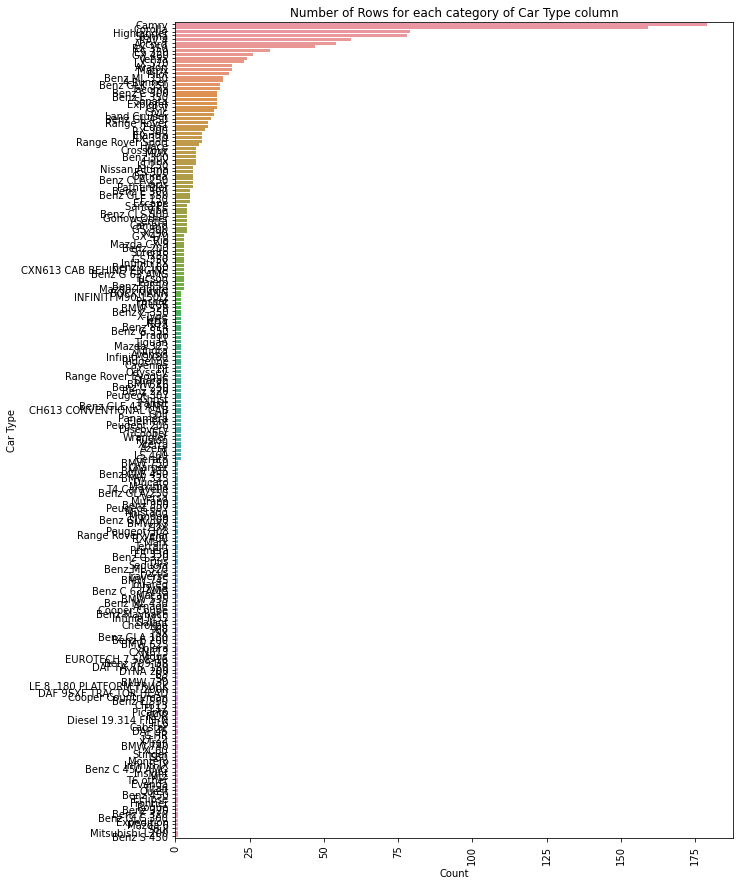

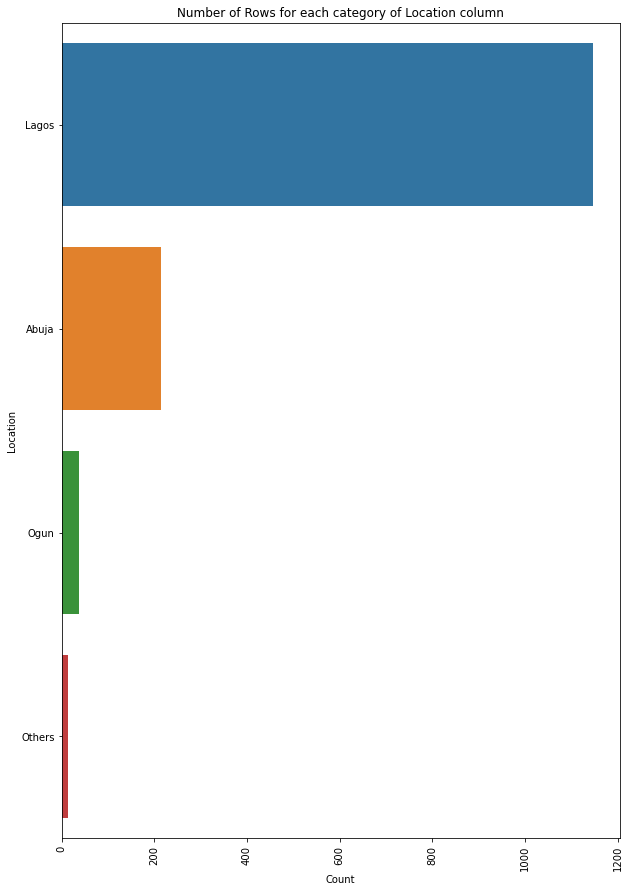

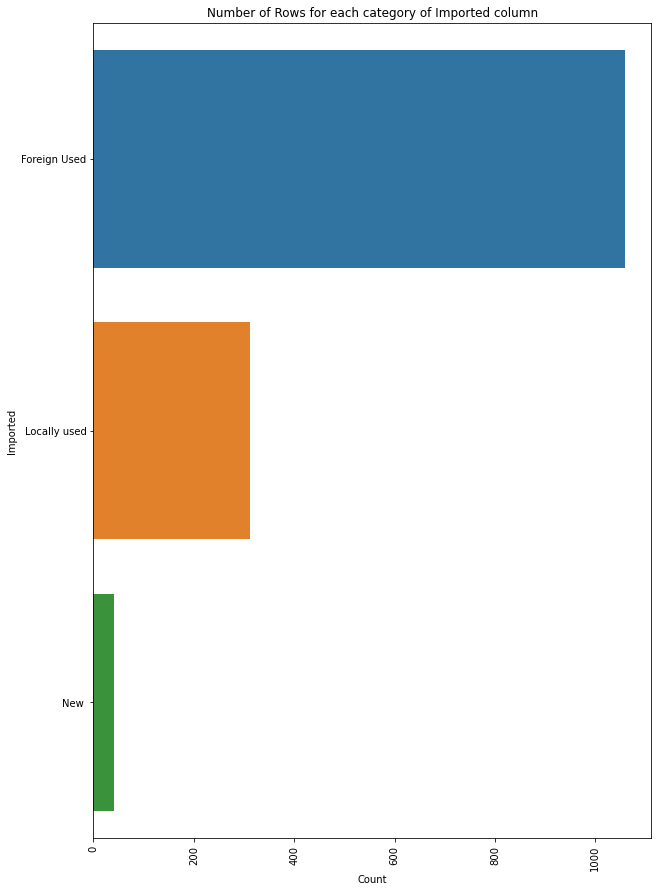

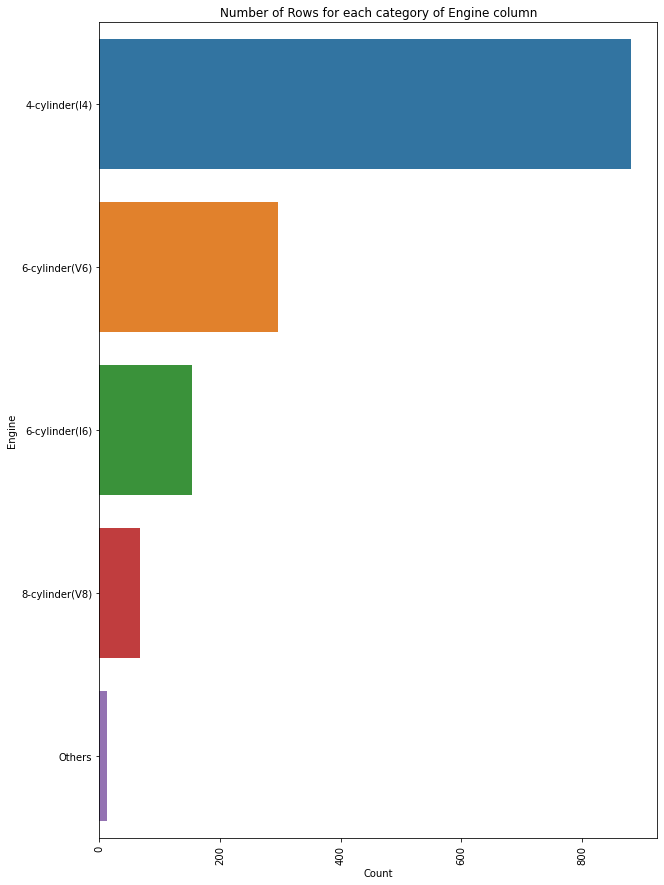

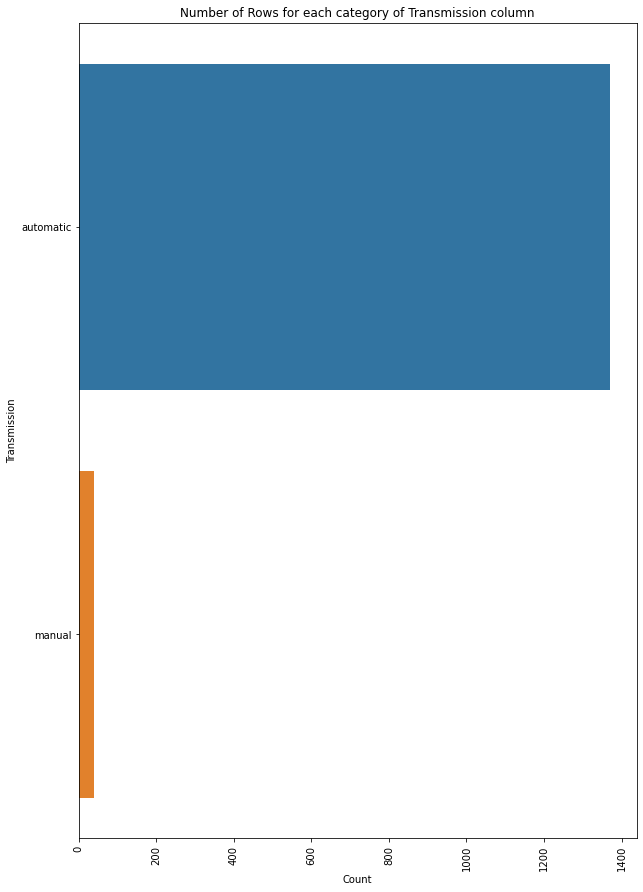

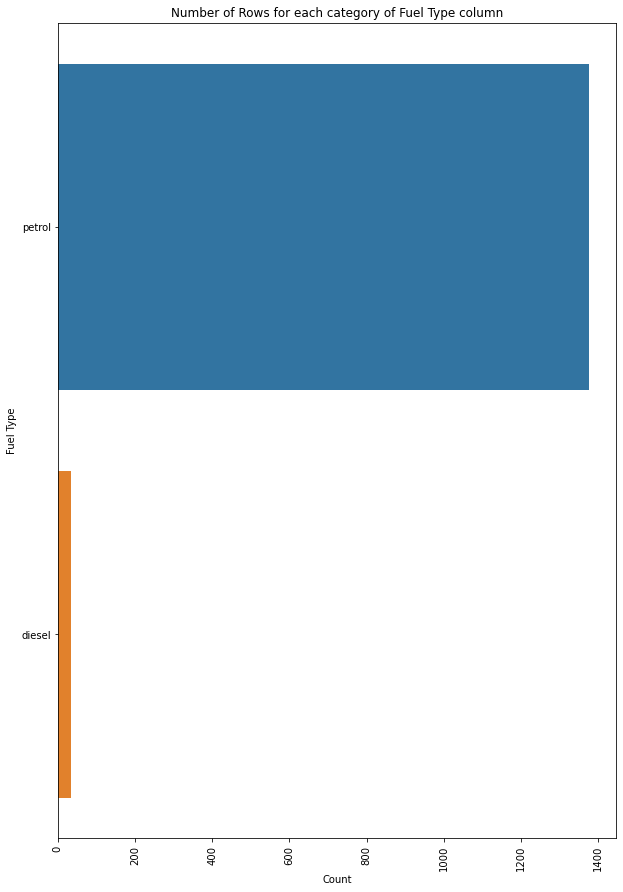

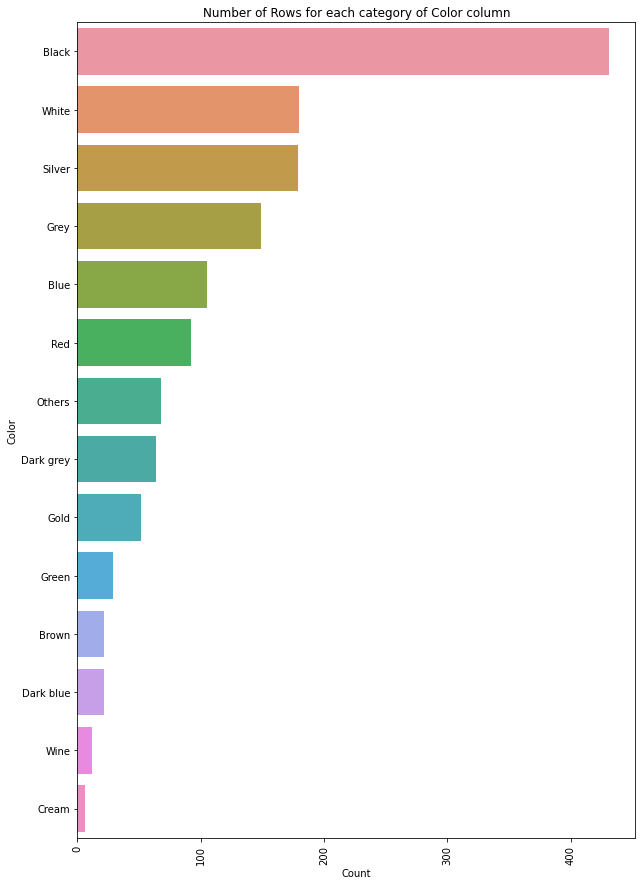

In [44]:
# fig, ax = plt.subplots(figsize=(10,10))

car_object = car.select_dtypes('object')

# Loop through each categorical column and create a bar chart
for col in car_object:
    # Count the number of rows for each category of the column
    col_counts = car[col].value_counts()
    fig, ax = plt.subplots(figsize=(10, 15))

    # Create a bar chart using Matplotlib
    ax = sns.barplot(x = col_counts.values, y = col_counts.index)

    # Add labels and title
    plt.title(f'Number of Rows for each category of {col} column')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.xticks(rotation = 90)

    # Display the chart
    plt.show()


<AxesSubplot:xlabel='Year', ylabel='Price'>

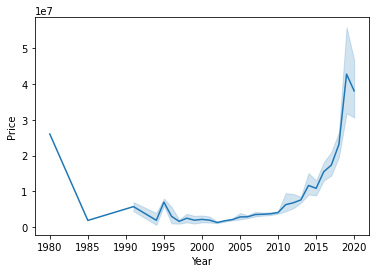

In [45]:
# is year affecting the increase in price?

sns.lineplot(x = car['Year'], y = car['Price'])

The data shows the year affects the price the newer the model(year), the increase in price

In [46]:
grouped_data = car.groupby(['Brand', 'Car Type'])['Price'].sum()
grouped = grouped_data.nlargest(5)
grouped

Brand   Car Type  
Lexus   LX 570        1171075000
Toyota  Camry          961918500
        Corolla        689893000
        Highlander     685242500
Lexus   GX 460         596470000
Name: Price, dtype: int64

In [47]:
#reset the index to plot

grouped = grouped.reset_index()

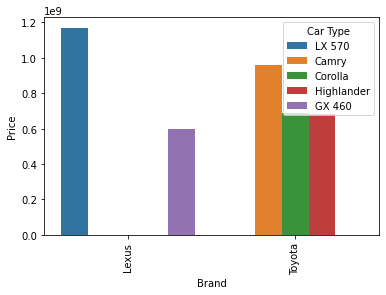

In [48]:
sns.barplot(x = 'Brand', y = 'Price', hue= 'Car Type', data = grouped)
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.show()

### Data Preprocessing/Feature Selection

In [49]:
#import libraries for preprocessing
from sklearn.preprocessing import LabelEncoder

In [50]:
#initialize the library

encoder = LabelEncoder()


In [53]:
#tranform the object values to number
car['Brand']= encoder.fit_transform(car['Brand'])


Label Mapping: {'Acura': 0, 'Alpina': 1, 'Audi': 2, 'Bentley': 3, 'Bmw': 4, 'Chevrolet': 5, 'Daf': 6, 'Dodge': 7, 'Fiat': 8, 'Ford': 9, 'Gac': 10, 'Gmc': 11, 'Honda': 12, 'Hyundai': 13, 'Infiniti': 14, 'Isuzu': 15, 'Iveco': 16, 'Jaguar': 17, 

'Jeep': 18, 'Jmc': 19, 'Kia': 20, 'Land-rover': 21, 'Lexus': 22, 'Lincoln': 23, 'Mack': 24, 'Man': 25, 'Mazda': 26, 

'Mercedes': 27, 'Mini': 28, 'Mitsubishi': 29, 'Nissan': 30, 'Peugeot': 31, 'Pontiac': 32, 'Porsche': 33, 'Rolls-royce': 34, 'Toyota': 35, 'Volkswagen': 36, 'Volvo': 37}

In [56]:
#for car type
car['Car Type']= encoder.fit_transform(car['Car Type'])

Label Mapping: {'17.22': 0, '4-Runner': 1, 'Accord': 2, 'Arnage': 3, 'Avalon': 4, 'Avensis': 5, 'Azera': 6, 'B3': 7, 'BMW 325': 8, 'BMW 335': 9, 'BMW 525': 10, 'BMW 528': 11, 'BMW 535': 12, 'BMW 730': 13, 'BMW 740': 14, 'BMW 745': 15, 'BMW 750': 16, 'BMW X3': 17, 'BMW X6': 18, 'BOCKMANN': 19, 'Benz 200': 20, 'Benz 220': 21, 'Benz 300': 22, 'Benz 320': 23, 'Benz 350': 24, 'Benz 450': 25, 'Benz 709 DB': 26, 'Benz 814': 27, 'Benz C 180': 28, 'Benz C 250': 29, 'Benz C 300': 30, 'Benz C 320': 31, 'Benz C 350': 32, 'Benz C 450 AMG': 33, 'Benz C 63 AMG': 34, 'Benz CLA 250': 35, 'Benz CLS 500': 36, 'Benz E 200': 37, 'Benz E 300': 38, 'Benz E 320': 39, 'Benz E 350': 40, 'Benz E 550': 41, 'Benz G 550': 42, 'Benz G 63 AMG': 43, 'Benz GL 450': 44, 'Benz GLA 180': 45, 'Benz GLA 250': 46, 'Benz GLC 300': 47, 'Benz GLE 350': 48, 'Benz GLE 43 AMG': 49, 'Benz GLE 450': 50, 'Benz GLK 300': 51, 'Benz GLK 350': 52, 'Benz ML 320': 53, 'Benz ML 350': 54, 'Benz ML 430': 55, 'Benz Maybach': 56, 'Benz S 450': 57, 'Benz S 550': 58, 'C-HR': 59, 'CH613': 60, 'CH613 CONVENTIONAL CAB': 61, 'CR-V': 62, 'CT 200h': 63, 'CXN613': 64, 'CXN613 CAB BEHIND ENGINE': 65, 'Cabstar': 66, 'Camaro': 67, 'Camry': 68, 'Cayenne': 69, 'Cerato': 70, 'Charger': 71, 'Cherokee': 72, 'Civic': 73, 'Cooper': 74, 'Cooper Countryman': 75, 'Cooper Coupé': 76, 'Corolla': 77, 'Crosstour': 78, 'DAF 45': 79, 'DAF 95XF TRACTOR HEAD': 80, 'DAF FA 55. 180': 81, 'DYNA 200': 82, 'Diesel 19.314 FILT-N': 83, 'Discovery': 84, 'Ducato': 85, 'Dyna': 86, 'ES 300': 87, 'ES 330': 88, 'ES 350': 89, 'EUROTECH 7.50E-16': 90, 'Eclipse': 91, 'Edge': 92, 'Elantra': 93, 'Element': 94, 'Escape': 95, 'Evanda': 96, 'Expedition': 97, 'Explorer': 98, 'F 150': 99, 'FL12': 100, 'FL6': 101, 'Fit': 102, 'Focus': 103, 'Frontier': 104, 'Fusion': 105, 'GS 300': 106, 'GS 350': 107, 'GX 460': 108, 'GX 470': 109, 'Galant': 110, 'Ghost': 111, 'Golf': 112, 'Gonow Other': 113, 'Hiace': 114, 'Highlander': 115, 'Hilux': 116, 'INFINITI M90.150/2': 117, 'IS 250': 118, 'Infiniti FX': 119, 'Infiniti JX': 120, 'Infiniti M35': 121, 'Infiniti QX80': 122, 'Insight': 123, 'Jetta': 124, 'LE 8. 180 PLATFORM TRUCK': 125, 'LS 460': 126, 'LT': 127, 'LX 570': 128, 'Land Cruiser': 129, 'MDX': 130, 'Macan': 131, 'Mark': 132, 'Matrix': 133, 'Maxima': 134, 'Mazda 323': 135, 'Mazda 6': 136, 'Mazda CX-9': 137, 'Mazda Tribute': 138, 'Mitsubishi L200': 139, 'Mondeo': 140, 'Montero': 141, 'Murano': 142, 'Mustang': 143, 'NQR': 144, 'Nissan Altima': 145, 'Odyssey': 146, 'Optima': 147, 'Pajero': 148, 'Panamera': 149, 'Passat': 150, 'Pathfinder': 151, 'Peugeot 206': 152, 'Peugeot 307': 153, 'Peugeot 308': 154, 'Peugeot 607': 155, 'Picanto': 156, 'Pilot': 157, 'Prado': 158, 'Primera': 159, 'Prius': 160, 'Quest': 161, 'RAV 4': 162, 'RDX': 163, 'RX 300': 164, 'RX 330': 165, 'RX 350': 166, 'RX 400': 167, 'Range Rover': 168, 'Range Rover Evoque': 169, 'Range Rover Sport': 170, 'Range Rover Velar': 171, 'Ridgeline': 172, 'Rio': 173, 'Rogue': 174, 'S6': 175, 'S80': 176, 'Santa Fe': 177, 'Sentra': 178, 'Sequoia': 179, 'Sharan': 180, 'Sienna': 181, 'Solara': 182, 'Sonata': 183, 'Sorento': 184, 'Soul': 185, 'Stinger': 186, 'T4 Caravelle': 187, 'T6 other': 188, 'TL': 189, 'TRUCK': 190, 'TSX': 191, 'Tacoma': 192, 'Terrain': 193, 'Tiguan': 194, 'Titan': 195, 'Touareg': 196, 'Transit': 197, 'Traverse': 198, 'Tucson': 199, 'Tundra': 200, 'Venza': 201, 'Versa': 202, 'Vibe': 203, 'Vigus': 204, 'Vitz': 205, 'Wrangler': 206, 'X-Trail': 207, 'X-Type': 208, 'XC60': 209, 'XC90': 210, 'XJ8': 211, 'Xterra': 212, 'Yaris': 213, 'ZDX': 214, 'ix35': 215}

In [62]:
car['Location'] = encoder.fit_transform(car['Location'])


{'Abuja': 0, 'Lagos': 1, 'Ogun': 2, 'Others': 3}

In [63]:
car['Imported'] = encoder.fit_transform(car['Imported'])

{'Foreign Used': 0, 'Locally used': 1, 'New ': 2}

In [64]:
car['Engine'] = encoder.fit_transform(car['Engine'])

{'4-cylinder(I4)': 0, '6-cylinder(I6)': 1, '6-cylinder(V6)': 2, '8-cylinder(V8)': 3, 'Others': 4}

In [65]:
car['Transmission'] = encoder.fit_transform(car['Transmission'])

{'automatic': 0, 'manual': 1}

In [66]:
car['Fuel Type'] = encoder.fit_transform(car['Fuel Type'])

{'diesel': 0, 'petrol': 1}

In [59]:
car['Color'] = encoder.fit_transform(car['Color'])

'Black': 0, 'Blue': 1, 'Brown': 2, 'Cream': 3, 'Dark blue': 4, 'Dark grey': 5, 'Gold': 6, 'Green': 7, 'Grey': 8, 'Others': 9, 'Red': 10, 'Silver': 11, 'White': 12, 'Wine': 13}

In [60]:
#to access the label of each classes

# label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# # Map the encoded data back to the original data using the dictionary
# decoded_data = [k for k, v in label_mapping.items() if v in car['Color']]

# print("Original Data:", car['Color'])
# print("Encoded Data:", brand)
# print("Decoded Data:", decoded_data)
# print("Label Mapping:", label_mapping)

In [67]:
#view the rows 

car.head()

,Brand,Car Type,Odometer,Location,Imported,Engine,Transmission,Fuel Type,Color,Year,Price
0,35,77,60127,1,1,0,0,1,11,2009,1995000
1,0,130,132908,1,0,2,0,1,13,2009,3315000
2,22,89,120412,1,1,2,0,1,11,2008,2655000
3,27,52,67640,1,0,0,0,1,0,2013,9015000
4,27,37,92440,0,0,0,0,1,0,2013,5790000


### Model Training

In [68]:
#import libraries needed
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost as xgb
from xgboost import XGBRegressor

In [69]:
X = car.drop('Price', axis=1)
y = car['Price'] 

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=456)

### LinearRegression

In [71]:
lr = LinearRegression()

In [72]:
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
r2_score(y_test, lr_pred)

0.3922192944323212

### RandomForestRegressor

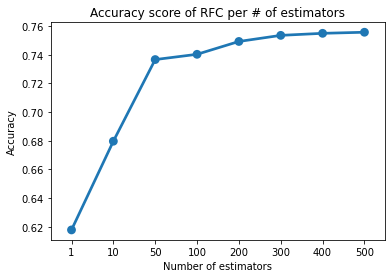

[0.6177574269462547, 0.6796517754883279, 0.7366343777413, 0.7403099935577179, 0.7492720111753703, 0.7535226133339126, 0.754951117930843, 0.7557013917708328]


In [73]:
# Find best n_estimators
score = []
est = []
estimators = [1, 10, 50, 100, 200, 300, 400, 500]

for e in estimators:
    rfc1 = RandomForestRegressor(n_estimators=e, random_state=42)
    pred1 = rfc1.fit(X_train, y_train).predict(X_test)
    accuracy = r2_score(y_test, pred1)
    score.append(accuracy)
    est.append(e)

plot = sns.pointplot(x=est, y=score)
plot.set(xlabel='Number of estimators', ylabel='Accuracy', title='Accuracy score of RFC per # of estimators')
plt.show()
print(score)

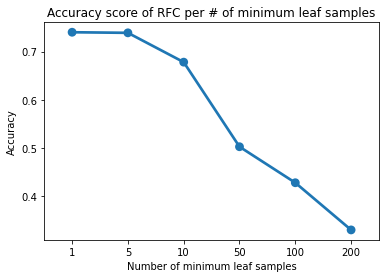

[0.7403099935577179, 0.7390839752830356, 0.6782215925689792, 0.5026076028296846, 0.42785753922480163, 0.32991254363665357]


In [74]:
# Find best min_samples_leaf
score = []
leaf = []
leaf_options = [1, 5, 10, 50, 100, 200]

for l in leaf_options:
    rfc2 = RandomForestRegressor(n_estimators=100, random_state=42, min_samples_leaf=l)
    pred2 = rfc2.fit(X_train, y_train).predict(X_test)
    accuracy = r2_score(y_test, pred2)
    score.append(accuracy)
    leaf.append(l)

plot = sns.pointplot(x=leaf, y=score)
plot.set(xlabel='Number of minimum leaf samples', ylabel='Accuracy', title='Accuracy score of RFC per # of minimum leaf samples')
plt.show()
print(score)

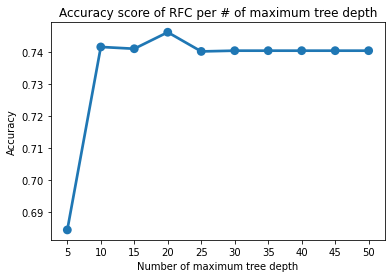

[0.6844072823640126, 0.7414713923509607, 0.7409134099886174, 0.7460597387453121, 0.7400756050640636, 0.7403099935577179, 0.7403099935577179, 0.7403099935577179, 0.7403099935577179, 0.7403099935577179]


In [75]:
# Find best max_depth
score = []
depth = []
depth_options = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

for d in depth_options:
    rfc3 = RandomForestRegressor(n_estimators=100, random_state=42, min_samples_leaf=1, max_depth=d)
    pred3 = rfc3.fit(X_train, y_train).predict(X_test)
    accuracy = r2_score(y_test, pred3)
    score.append(accuracy)
    depth.append(d)

plot = sns.pointplot(x=depth, y=score)
plot.set(xlabel='Number of maximum tree depth', ylabel='Accuracy', title='Accuracy score of RFC per # of maximum tree depth')
plt.show()
print(score)

In [76]:
rf=RandomForestRegressor(criterion='squared_error',n_estimators=500, min_samples_leaf=1, max_depth=20, random_state=42)

In [77]:
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
r2_score(y_test, rf_pred)

0.7588090704015061

In [78]:
pd.DataFrame({'y_test': y_test,
              'rf_pred': rf_pred})

,y_test,rf_pred
1305,4195000,5.023043e+06
864,2170000,2.103384e+06
1211,13515000,1.469859e+07
730,7895000,8.130630e+06
426,7415000,6.932430e+06
...,...,...
313,4915000,4.524831e+06
631,3515000,3.338154e+06
847,8265000,8.008300e+06
789,21015000,4.120793e+07


### AdaBoostRegressor

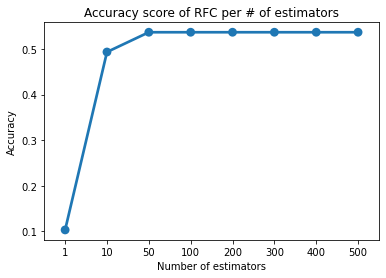

[0.10314611136810281, 0.4933383933947313, 0.5366964168201471, 0.5366964168201471, 0.5366964168201471, 0.5366964168201471, 0.5366964168201471, 0.5366964168201471]


In [79]:
# Find best n_estimators
score = []
est = []
estimators = [1, 10, 50, 100, 200, 300, 400, 500]

for e in estimators:
    rfc1 = AdaBoostRegressor(n_estimators=e, random_state=42)
    pred1 = rfc1.fit(X_train, y_train).predict(X_test)
    accuracy = r2_score(y_test, pred1)
    score.append(accuracy)
    est.append(e)

plot = sns.pointplot(x=est, y=score)
plot.set(xlabel='Number of estimators', ylabel='Accuracy', title='Accuracy score of RFC per # of estimators')
plt.show()
print(score)

In [80]:
ada = AdaBoostRegressor(base_estimator= rf, n_estimators=50,random_state=42)

In [81]:
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
r2_score(y_test, ada_pred)

0.8007118954349717

In [82]:
pd.DataFrame({'y_test': y_test,
              'rf_pred': ada_pred})

,y_test,rf_pred
1305,4195000,6151710.0
864,2170000,2351235.0
1211,13515000,13882430.0
730,7895000,8237895.0
426,7415000,7702460.0
...,...,...
313,4915000,4259670.0
631,3515000,4403345.0
847,8265000,8293590.0
789,21015000,38398030.0


### XGBRegressor

In [83]:
model = XGBRegressor()

In [84]:
model.fit(X_train, y_train)
xgb_pred = model.predict(X_test)
r2_score(y_test, xgb_pred)

0.7313089520526781

In [85]:
pd.DataFrame({'y_test': y_test,
              'rf_pred': xgb_pred})

,y_test,rf_pred
1305,4195000,5044682.50
864,2170000,2208216.75
1211,13515000,13417013.00
730,7895000,6127826.50
426,7415000,7041486.00
...,...,...
313,4915000,4440504.50
631,3515000,3620479.75
847,8265000,7923365.00
789,21015000,31259874.00


### Summary/Conclusion

from the data above, Randomforest had 65% score after boosting it with Adaboost it improved to 67%


In [87]:
#save the model
import pickle
pickle.dump(ada,open('car.pkl', 'wb'))